# Visualizations

In [ ]:
from pathlib import PosixPath
import ipyplot
import cv2
from PIL import Image
is_jupyter = get_ipython().__class__.__name__ == 'ZMQInteractiveShell'

# Images

In [ ]:
# !pip install opencv-python

In [ ]:
im = 'assets/image_20211012_row53_col1.png'
mask = 'assets/mask_20211012_row53_col1.png'

The easiest way to visualize images is through PIL:

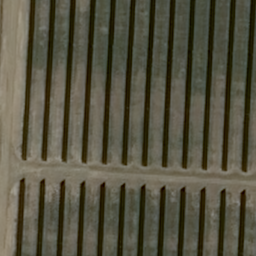

In [ ]:
im_pil = Image.open(im)
im_pil

If one needs to use OpenCV:

In [ ]:
def load_image(im):
    if isinstance(im, (str, PosixPath)):  # if str or Path load image
        im = cv2.imread(str(im))
    elif isinstance(im, Image.Image):  # convert PIL.Image.Image to numpy.array
        im = np.array(im)
    return im


def show_image(im, title=None):
    """
    Load and show (or not) image using cv2.

    Args:
        im (str or Path or numpy.array or PIL.Image.Image)

    Returns:
        key pressed (str)

    """
    im = load_image(im)
    if not is_jupyter:
        print('Image is shown on desktop.')
        cv2.imshow(title if title else 'pic-display', im)
        print('Press any button to continue (if needed click on an image window too; Q to break).')
        key_pressed = chr(cv2.waitKey(0))  # 0 to wait for user input, >0 for milliseconds to wait
        return key_pressed
    else:
        display(Image.fromarray(im))

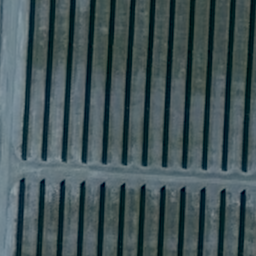

In [ ]:
show_image(im, 'image')

## Matplotlib.pyplot.axis.plot

See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

## Plot multiple images

We can use `ipyplot` (`pip install ipyplot`), but it has annoying [issue](https://github.com/karolzak/ipyplot/issues/53). Instead I made a custom one: 

In [ ]:
from utils.plot import plot_pil_images

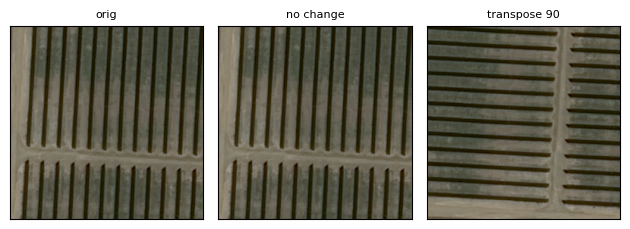

In [ ]:
plot_pil_images([im_pil, im_pil, im_pil.transpose(Image.ROTATE_90)], 
                ['orig', 'no change', 'transpose 90'])

# Graphs

The following is a pseudo-code for demonstration.

To specify the legend location:

In [ ]:
plt.legend(leg, bbox_to_anchor=(1.04,1))

some legend arguments:

In [ ]:
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

if no legend is specified then the `label` will be used:

In [ ]:
plt.plot(t1, t1**n, label=f"n={n}")